<a href="https://colab.research.google.com/github/OlehVakulchyk/DataScience/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте csv файл (використовуйте функцію read_csv)

Виведіть перші п'ять рядків (використовується функція head)

Виведіть розміри датасету (використовуйте атрибут shape)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?

550 книг

Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [4]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)

Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [5]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

 Які є унікальні жанри?

 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

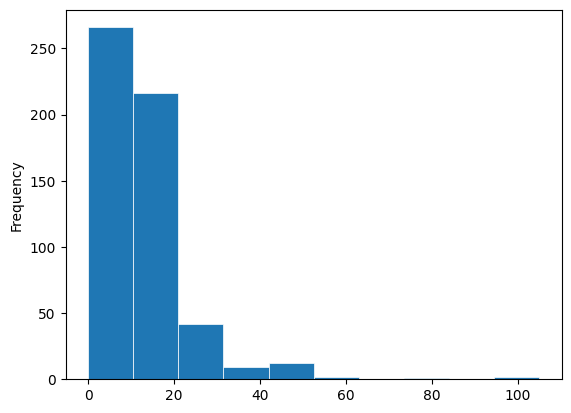

In [6]:
import matplotlib.pyplot as plt

df['price'].plot( kind='hist', linewidth=0.5, edgecolor="white")
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [7]:
df.agg({'price':['max', 'min', 'mean', 'median']})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


Максимальна ціна?   105.0

Мінімальна ціна?      0.0

Середня ціна?        13.1

Медіанна ціна?       11.0


In [8]:
df['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [9]:
df[df['user_rating']==df['user_rating'].max()]['name'].count()

52

Скільки книг мають такий рейтинг? Відповідь: 52

In [10]:
df['reviews'].max()

87841

In [11]:
df[df['reviews']==df['reviews'].max()]['name']

534    Where the Crawdads Sing
Name: name, dtype: object

Яка книга має найбільше відгуків? Відповідь:  Where the Crawdads Sing

In [12]:
df1 = df[df['year']==2015]
df1[df1['price']==df1['price'].max()]['name']

277    Publication Manual of the American Psychologic...
Name: name, dtype: object

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:  Publication Manual of the American Psychologic...

In [13]:
df[(df['genre']=='Fiction') & (df['year']==2010)]['name'].count()

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:  20

In [26]:
df[(df['user_rating']==4.9) & ((df['year']==2010) | (df['year']==2011))]['name'].count()

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [15]:
df[(df['year']==2015) & (df['price']<8)].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку? Відповідь:  Old School (Diary of a Wimpy Kid #10)

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [16]:
df.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction: Відповідь  82

Мінімальна ціна для жанру Fiction: Відповідь    0

Максимальна ціна для жанру Non Fiction: Відповідь  105

Мінімальна ціна для жанру Non Fiction: Відповідь     0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [17]:
count_book_of_author = df.groupby('author')['name'].agg(['count'])
count_book_of_author

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [18]:
count_book_of_author.shape

(248, 1)

Якої розмірності вийшла таблиця? Відповідь: (248,1)

In [19]:
count_book_of_author[count_book_of_author['count']==count_book_of_author['count'].max()]

,count
author,
Jeff Kinney,12


Який автор має найбільше книг? Відповідь:  Jeff Kinney

Скільки книг цього автора? Відповідь:  12



Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні



In [20]:
mean_user_rating_for_author = df.groupby('author')['user_rating'].agg(['mean']).round(2)
mean_user_rating_for_author

,mean
author,
Abraham Verghese,4.60
Adam Gasiewski,4.40
Adam Mansbach,4.80
Adir Levy,4.80
Admiral William H. McRaven,4.70
...,...
Walter Isaacson,4.57
William Davis,4.40
William P. Young,4.60


In [21]:
mean_user_rating_for_author[mean_user_rating_for_author['mean']==mean_user_rating_for_author['mean'].min()]

,mean
author,
Donna Tartt,3.9


У якого автора середній рейтинг мінімальний? Відповідь:  Donna Tartt

Який у цього автора середній рейтинг? Відповідь:  3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [22]:
author_books_and_raiting = pd.concat([count_book_of_author, mean_user_rating_for_author], axis=1)
author_books_and_raiting

,count,mean
author,,
Abraham Verghese,2,4.60
Adam Gasiewski,1,4.40
Adam Mansbach,1,4.80
Adir Levy,1,4.80
Admiral William H. McRaven,1,4.70
...,...,...
Walter Isaacson,3,4.57
William Davis,2,4.40
William P. Young,2,4.60


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [23]:
author_books_and_raiting.sort_values(['count', 'mean'])

,count,mean
author,,
Muriel Barbery,1,4.00
Chris Cleave,1,4.10
Ian K. Smith M.D.,1,4.10
Pierre Dukan,1,4.10
Elizabeth Strout,1,4.20
...,...,...
American Psychological Association,10,4.50
Suzanne Collins,11,4.66
Gary Chapman,11,4.74


Який автор перший у списку?   Muriel Barbery

Графіки

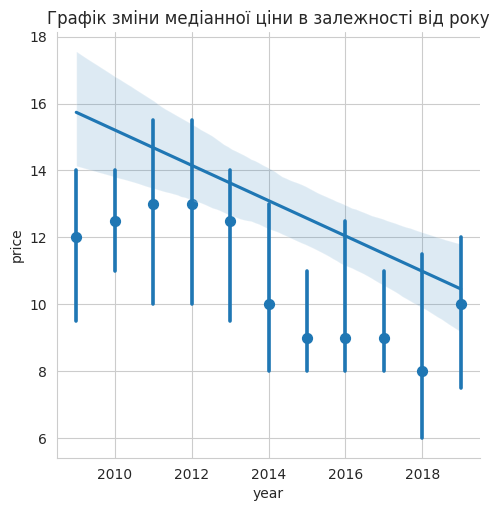

In [38]:
import seaborn as sns
from numpy import median
sns.lmplot(data=df.sort_values(by='user_rating', ascending=True),
             x="year",
             y="price",
           x_estimator=median)
plt.title('Графік зміни медіанної ціни в залежності від року')
plt.show()

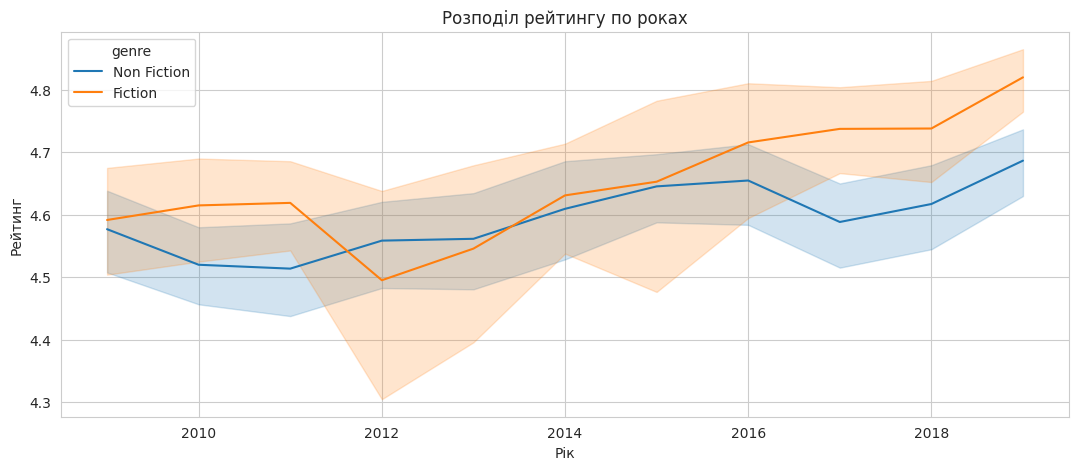

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(13,5))
sns.lineplot(data=df, x='year', y='user_rating', hue='genre')
plt.xlabel('Рік')
plt.ylabel('Рейтинг')
plt.title('Розподіл рейтингу по роках')
plt.show()

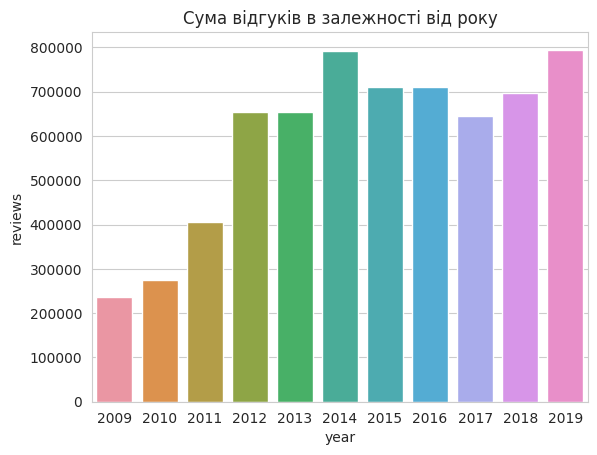

In [32]:
year_data = df.groupby('year').agg({'reviews': 'sum'})
sns.barplot(data=year_data, y='reviews', x=year_data.index)
plt.title('Сума відгуків в залежності від року')
plt.show()